![alt text](https://miro.medium.com/max/1442/1*DBXf6dzNB78QPHGDofHA4Q.png)

#Load Data



In [0]:
! git clone https://github.com/manmeet0307/EarData


Cloning into 'EarData'...
remote: Enumerating objects: 28576, done.
remote: Total 28576 (delta 0), reused 0 (delta 0), pack-reused 28576
Receiving objects: 100% (28576/28576), 95.41 MiB | 32.29 MiB/s, done.
Resolving deltas: 100% (6399/6399), done.
Checking out files: 100% (28412/28412), done.


In [0]:
import os,shutil
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image

Using TensorFlow backend.


#Divide the Data into Test, Train and Validation Set



1.   Create Folders:Test,Train,Validation
2.   Split data
3.   Rearrage data according to their gender
4.   Move the data to their destination folder




In [0]:
classes=["Male","Female"]
if not os.path.isdir("test"):
  os.mkdir("test")

if not os.path.isdir("val"):
  os.mkdir("val")

if not os.path.isdir("train"):
  os.mkdir("train")

for c in classes:
  p=os.path.join("test",c)
  if not os.path.isdir(p):
    os.mkdir(p)


for c in classes:
  p=os.path.join("train",c)
  if not os.path.isdir(p):
    os.mkdir(p)

for c in classes:
  p=os.path.join("val",c)
  if not os.path.isdir(p):
    os.mkdir(p)


In [0]:
folders=os.listdir("EarData")
folders.index(".git")


18

In [0]:
folders.pop(18)
print(len(folders))

164


In [0]:
splitTrain=0.9
splitVal=0.8
# count=0
for f in folders:
  Subfolder="EarData"+"/"+f
  # count=count+1
  #print(count)
  #Total File in particular folder
  imgs=os.listdir(Subfolder)

  test_split_size=int(splitTrain*len(imgs))

  #Test_Set and Train_Set
  train_set=imgs[:test_split_size]
  test_set=imgs[test_split_size:]

  val_split_size=int(splitVal*len(train_set))

  #Validation_Set
  val_set=train_set[val_split_size:]
  train_set=train_set[:val_split_size]

  #Ear Type 
  label=str(f).split(".")[0]
  Subfolder_num=int(label)
  currLabel="Female"                              
  if(Subfolder_num>=1 and Subfolder_num<=98):
    currLabel="Male"

  #Train
  for img_train in train_set:
    src=os.path.join(Subfolder,img_train)
    dest=os.path.join("train/"+currLabel,img_train)
    shutil.move(src,dest)

  #Test
  for img_test in test_set:
    src=os.path.join(Subfolder,img_test)
    dest=os.path.join("test/"+currLabel,img_test)
    shutil.move(src,dest)

  #Validation 
  for img_val in val_set:
    src=os.path.join(Subfolder,img_val)
    dest=os.path.join("val/"+currLabel,img_val)
    shutil.move(src,dest)

In [0]:
print("Train:Female:",len(os.listdir("train/Female")))
print("Train:Male:",len(os.listdir("train/Male")))
print("****************************************************************************")
print("Test:Female:",len(os.listdir("test/Female")))
print("Test:Male:",len(os.listdir("test/Male")))
print("****************************************************************************")
print("Validation:Female:",len(os.listdir("val/Female")))
print("Validation:Male:",len(os.listdir("val/Male")))
print("****************************************************************************")


Train:Female: 7767
Train:Male: 12471
****************************************************************************
Test:Female: 1103
Test:Male: 1779
****************************************************************************
Validation:Female: 1971
Validation:Male: 3158
****************************************************************************


#VGG ( Fine Tuning)-13

In [0]:
from keras.models import Model
from keras.layers import *
from keras import optimizers
from keras.applications import *


In [0]:
vgg=VGG16(include_top=False, weights='imagenet', input_shape=(150,150,3))
adam=optimizers.adam(lr=1e-4)
vgg.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['acc'])






58892288/58889256 [==============================] - 2s 0us/step










In [0]:
av1=GlobalAveragePooling2D()(vgg.output)
fc1=Dense(256,activation='relu')(av1)
d1=Dropout(0.5)(fc1)
fc2=Dense(2,activation='softmax')(d1)

new_vgg=Model(input=vgg.input,output=fc2)


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  


In [0]:
new_vgg.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['acc'])
new_vgg.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0   

In [0]:
for ix in range(len(new_vgg.layers)):
  print(ix, new_vgg.layers[ix])

0 <keras.engine.input_layer.InputLayer object at 0x7f0385105668>
1 <keras.layers.convolutional.Conv2D object at 0x7f03851057b8>
2 <keras.layers.convolutional.Conv2D object at 0x7f03c0906630>
3 <keras.layers.pooling.MaxPooling2D object at 0x7f03850d6630>
4 <keras.layers.convolutional.Conv2D object at 0x7f03850f4860>
5 <keras.layers.convolutional.Conv2D object at 0x7f03848a77b8>
6 <keras.layers.pooling.MaxPooling2D object at 0x7f03848ac6a0>
7 <keras.layers.convolutional.Conv2D object at 0x7f03848b3c50>
8 <keras.layers.convolutional.Conv2D object at 0x7f03848b7d30>
9 <keras.layers.convolutional.Conv2D object at 0x7f03848bec18>
10 <keras.layers.pooling.MaxPooling2D object at 0x7f03848c9400>
11 <keras.layers.convolutional.Conv2D object at 0x7f0384850b00>
12 <keras.layers.convolutional.Conv2D object at 0x7f0384855c50>
13 <keras.layers.convolutional.Conv2D object at 0x7f038485bac8>
14 <keras.layers.pooling.MaxPooling2D object at 0x7f0384869320>
15 <keras.layers.convolutional.Conv2D object at 

In [0]:
for ix in range(14):
  new_vgg.layers[ix].trainable=False


In [0]:
new_vgg.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['acc'])
new_vgg.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0   

#Image Data Generator

In [0]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [0]:
image_gen=ImageDataGenerator(
    rescale=1/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.3,
)

val_gen=ImageDataGenerator(
    rescale=1/255.0,
)

train_generator=image_gen.flow_from_directory(
    "train/",
    target_size=(150,150),
    class_mode='categorical',
    batch_size=32,
    shuffle=True
)

Found 20238 images belonging to 2 classes.


In [0]:
val_generator=val_gen.flow_from_directory(
    "val/",
    target_size=(150,150),
    class_mode='categorical',
    batch_size=32,
    shuffle=True
)

Found 5129 images belonging to 2 classes.


#Training

In [0]:
hist=new_vgg.fit_generator(
    train_generator,
    epochs=10,
    steps_per_epoch=851,
    validation_data=val_generator,
    validation_steps=12
    )

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/10
851/851 [==============================] - 151s 177ms/step - loss: 0.4415 - acc: 0.7964 - val_loss: 0.3025 - val_acc: 0.8750
Epoch 2/10
851/851 [==============================] - 144s 169ms/step - loss: 0.3120 - acc: 0.8693 - val_loss: 0.1947 - val_acc: 0.9219
Epoch 3/10
851/851 [==============================] - 145s 171ms/step - loss: 0.2737 - acc: 0.8890 - val_loss: 0.1774 - val_acc: 0.9219
Epoch 4/10
851/851 [==============================] - 144s 169ms/step - loss: 0.2398 - acc: 0.9028 - val_loss: 0.2294 - val_acc: 0.9010
Epoch 5/10
851/851 [==============================] - 145s 170ms/step - loss: 0.2150 - acc: 0.9135 - val_loss: 0.2133 - val_acc: 0.9219
Epoch 6/10
851/851 [==============================] - 143s 168ms/step - loss: 0.1954 - acc: 0.9226 - val_loss: 0.2024 - val_acc: 0.9167
Epoch 7/10
851/851 [==============================] - 144s 170ms/step - loss: 0.1734 - a

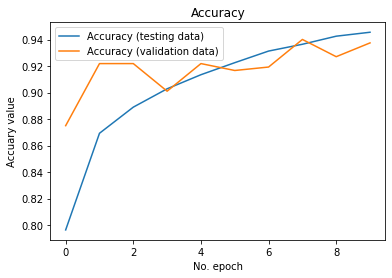

In [0]:
ACC=hist.history['acc']
VAL_ACC=hist.history['val_acc']
# Plot history: Accuracy
plt.plot(ACC, label='Accuracy (testing data)')
plt.plot(VAL_ACC, label='Accuracy (validation data)')
plt.title('Accuracy')
plt.ylabel('Accuary value')
plt.xlabel('No. epoch')
plt.legend()
plt.show()


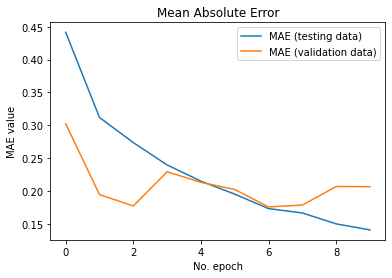

In [0]:
LOSS=hist.history['loss']
VAL_LOSS=hist.history['val_loss']
# Plot history: Mean Absolute Error
plt.plot(LOSS, label='MAE (testing data)')
plt.plot(VAL_LOSS, label='MAE (validation data)')
plt.title('Mean Absolute Error')
plt.ylabel('MAE value')
plt.xlabel('No. epoch')
plt.legend()
plt.show()


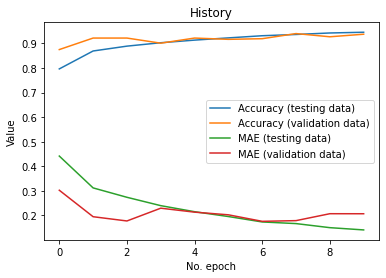

In [0]:
LOSS=hist.history['loss']
VAL_LOSS=hist.history['val_loss']
ACC=hist.history['acc']
VAL_ACC=hist.history['val_acc']

plt.plot(ACC, label='Accuracy (testing data)')
plt.plot(VAL_ACC, label='Accuracy (validation data)')
plt.plot(LOSS, label='MAE (testing data)')
plt.plot(VAL_LOSS, label='MAE (validation data)')
plt.title('History')
plt.ylabel('Value')
plt.xlabel('No. epoch')
plt.legend()
plt.show()


In [0]:
test_generator=val_gen.flow_from_directory(
    "test/",
    target_size=(150,150),
    class_mode='categorical',
    batch_size=32,
    shuffle=True
)

Found 2882 images belonging to 2 classes.


In [0]:
test_hist=new_vgg.evaluate_generator(
    test_generator,
    steps=91
)

In [0]:
test_hist

[0.23736066232352354, 0.9212352532963219]

#VGG ( Fine Tuning)-10




In [0]:
vgg=VGG16(include_top=False, weights='imagenet', input_shape=(150,150,3))
adam=optimizers.adam(lr=1e-4)
vgg.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['acc'])


In [0]:
av1=GlobalAveragePooling2D()(vgg.output)
fc1=Dense(256,activation='relu')(av1)
d1=Dropout(0.5)(fc1)
fc2=Dense(2,activation='softmax')(d1)

new_vgg=Model(input=vgg.input,output=fc2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  


In [0]:
new_vgg.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['acc'])


In [0]:
for ix in range(11):
  new_vgg.layers[ix].trainable=False


In [0]:
new_vgg.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['acc'])
new_vgg.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0   

In [0]:
hist=new_vgg.fit_generator(
    train_generator,
    epochs=10,
    steps_per_epoch=851,
    validation_data=val_generator,
    validation_steps=12
    )

Epoch 1/10
851/851 [==============================] - 152s 179ms/step - loss: 0.5063 - acc: 0.7517 - val_loss: 0.2738 - val_acc: 0.8906
Epoch 2/10
851/851 [==============================] - 153s 180ms/step - loss: 0.3267 - acc: 0.8625 - val_loss: 0.2190 - val_acc: 0.9167
Epoch 3/10
851/851 [==============================] - 151s 178ms/step - loss: 0.2679 - acc: 0.8932 - val_loss: 0.2122 - val_acc: 0.9062
Epoch 4/10
851/851 [==============================] - 153s 180ms/step - loss: 0.2320 - acc: 0.9091 - val_loss: 0.1710 - val_acc: 0.9297
Epoch 5/10
851/851 [==============================] - 155s 182ms/step - loss: 0.2128 - acc: 0.9162 - val_loss: 0.1917 - val_acc: 0.9323
Epoch 6/10
851/851 [==============================] - 154s 181ms/step - loss: 0.1889 - acc: 0.9242 - val_loss: 0.1835 - val_acc: 0.9219
Epoch 7/10
851/851 [==============================] - 156s 183ms/step - loss: 0.1706 - acc: 0.9334 - val_loss: 0.2104 - val_acc: 0.9271
Epoch 8/10
851/851 [============================

In [0]:
hist1=new_vgg.fit_generator(
    train_generator,
    epochs=5,
    steps_per_epoch=851,
    validation_data=val_generator,
    validation_steps=12
    )

Epoch 1/5
851/851 [==============================] - 155s 182ms/step - loss: 0.1194 - acc: 0.9554 - val_loss: 0.1657 - val_acc: 0.9375
Epoch 2/5
851/851 [==============================] - 154s 181ms/step - loss: 0.1088 - acc: 0.9596 - val_loss: 0.3061 - val_acc: 0.9271
Epoch 3/5
851/851 [==============================] - 155s 182ms/step - loss: 0.1037 - acc: 0.9606 - val_loss: 0.1104 - val_acc: 0.9479
Epoch 4/5
851/851 [==============================] - 156s 183ms/step - loss: 0.0895 - acc: 0.9672 - val_loss: 0.1900 - val_acc: 0.9375
Epoch 5/5
851/851 [==============================] - 154s 182ms/step - loss: 0.0857 - acc: 0.9695 - val_loss: 0.1801 - val_acc: 0.9479


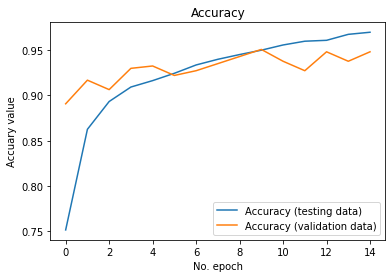

In [0]:
ACC=hist.history['acc']+hist1.history['acc']
VAL_ACC=hist.history['val_acc']+hist1.history['val_acc']
# Plot history: Accuracy
plt.plot(ACC, label='Accuracy (testing data)')
plt.plot(VAL_ACC, label='Accuracy (validation data)')
plt.title('Accuracy')
plt.ylabel('Accuary value')
plt.xlabel('No. epoch')
plt.legend()
plt.show()


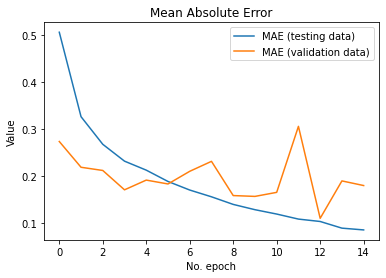

In [0]:
LOSS=hist.history['loss']+hist1.history['loss']
VAL_LOSS=hist.history['val_loss']+hist1.history['val_loss']

plt.plot(LOSS, label='MAE (testing data)')
plt.plot(VAL_LOSS, label='MAE (validation data)')
plt.title('Mean Absolute Error')
plt.ylabel('Value')
plt.xlabel('No. epoch')
plt.legend()
plt.show()


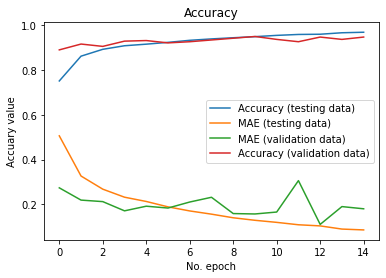

In [0]:
ACC=hist.history['acc']+hist1.history['acc']
VAL_ACC=hist.history['val_acc']+hist1.history['val_acc']
plt.plot(ACC, label='Accuracy (testing data)')
LOSS=hist.history['loss']+hist1.history['loss']
VAL_LOSS=hist.history['val_loss']+hist1.history['val_loss']

plt.plot(LOSS, label='MAE (testing data)')
plt.plot(VAL_LOSS, label='MAE (validation data)')

plt.plot(VAL_ACC, label='Accuracy (validation data)')
plt.title('Accuracy')
plt.ylabel('Accuary value')
plt.xlabel('No. epoch')
plt.legend()
plt.show()


In [0]:
test_hist=new_vgg.evaluate_generator(
    test_generator,
    steps=91
)

In [0]:
test_hist

[0.1834191476291538, 0.9441360166551006]

#VGG ( Fine Tuning)-6




In [0]:
vgg=VGG16(include_top=False, weights='imagenet', input_shape=(150,150,3))
adam=optimizers.adam(lr=1e-4)
vgg.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['acc'])


In [0]:
av1=GlobalAveragePooling2D()(vgg.output)
fc1=Dense(256,activation='relu')(av1)
d1=Dropout(0.5)(fc1)
fc2=Dense(2,activation='softmax')(d1)

new_vgg=Model(input=vgg.input,output=fc2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  


In [0]:
for ix in range(7):
  new_vgg.layers[ix].trainable=False
new_vgg.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['acc'])
new_vgg.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0   

In [0]:
hist=new_vgg.fit_generator(
    train_generator,
    epochs=15,
    steps_per_epoch=851,
    validation_data=val_generator,
    validation_steps=12
    )

Epoch 1/15
851/851 [==============================] - 161s 189ms/step - loss: 0.5215 - acc: 0.7376 - val_loss: 0.3278 - val_acc: 0.8438
Epoch 2/15
851/851 [==============================] - 161s 189ms/step - loss: 0.3354 - acc: 0.8588 - val_loss: 0.1937 - val_acc: 0.9193
Epoch 3/15
851/851 [==============================] - 159s 186ms/step - loss: 0.2699 - acc: 0.8913 - val_loss: 0.1894 - val_acc: 0.9271
Epoch 4/15
851/851 [==============================] - 159s 187ms/step - loss: 0.2451 - acc: 0.9007 - val_loss: 0.1665 - val_acc: 0.9297
Epoch 5/15
851/851 [==============================] - 159s 187ms/step - loss: 0.2160 - acc: 0.9143 - val_loss: 0.2070 - val_acc: 0.9271
Epoch 6/15
851/851 [==============================] - 159s 187ms/step - loss: 0.2009 - acc: 0.9204 - val_loss: 0.1884 - val_acc: 0.9115
Epoch 7/15
851/851 [==============================] - 158s 186ms/step - loss: 0.1789 - acc: 0.9301 - val_loss: 0.2087 - val_acc: 0.9193
Epoch 8/15
851/851 [============================

In [0]:
hist1=new_vgg.fit_generator(
    train_generator,
    epochs=3,
    steps_per_epoch=851,
    validation_data=val_generator,
    validation_steps=12
    )

Epoch 1/3
851/851 [==============================] - 157s 185ms/step - loss: 0.0883 - acc: 0.9672 - val_loss: 0.1528 - val_acc: 0.9505
Epoch 2/3
851/851 [==============================] - 158s 186ms/step - loss: 0.0827 - acc: 0.9678 - val_loss: 0.1557 - val_acc: 0.9401
Epoch 3/3
851/851 [==============================] - 158s 186ms/step - loss: 0.0763 - acc: 0.9711 - val_loss: 0.2043 - val_acc: 0.9349


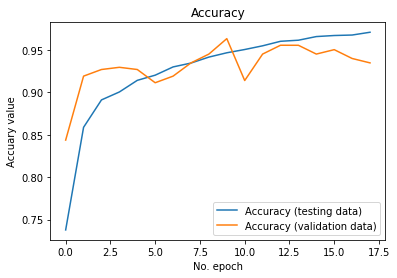

In [0]:
ACC=hist.history['acc']+hist1.history['acc']
VAL_ACC=hist.history['val_acc']+hist1.history['val_acc']
# Plot history: Accuracy
plt.plot(ACC, label='Accuracy (testing data)')
plt.plot(VAL_ACC, label='Accuracy (validation data)')
plt.title('Accuracy')
plt.ylabel('Accuary value')
plt.xlabel('No. epoch')
plt.legend()
plt.show()


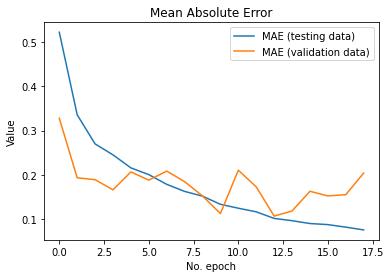

In [0]:
LOSS=hist.history['loss']+hist1.history['loss']
VAL_LOSS=hist.history['val_loss']+hist1.history['val_loss']

plt.plot(LOSS, label='MAE (testing data)')
plt.plot(VAL_LOSS, label='MAE (validation data)')
plt.title('Mean Absolute Error')
plt.ylabel('Value')
plt.xlabel('No. epoch')
plt.legend()
plt.show()


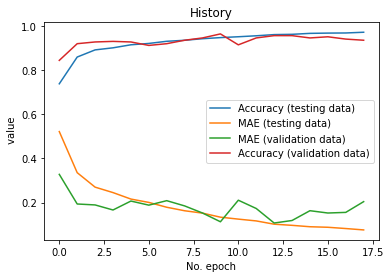

In [0]:

ACC=hist.history['acc']+hist1.history['acc']
VAL_ACC=hist.history['val_acc']+hist1.history['val_acc']
plt.plot(ACC, label='Accuracy (testing data)')
LOSS=hist.history['loss']+hist1.history['loss']
VAL_LOSS=hist.history['val_loss']+hist1.history['val_loss']

plt.plot(LOSS, label='MAE (testing data)')
plt.plot(VAL_LOSS, label='MAE (validation data)')

plt.plot(VAL_ACC, label='Accuracy (validation data)')
plt.title('History')
plt.ylabel(' value')
plt.xlabel('No. epoch')
plt.legend()
plt.show()


In [0]:
test_hist=new_vgg.evaluate_generator(
    test_generator,
    steps=91
)

In [0]:
test_hist

[0.23233760974779052, 0.9399722414989591]